In [42]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import nltk
import seaborn as sns


In [43]:
train_df = pd.read_csv('train_2kmZucJ.csv')
train_df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [44]:
test_df = pd.read_csv('test_oJQbWVk.csv')

In [45]:
new_df = pd.DataFrame({'tidy_tweet': []})
train_df = train_df.append(new_df)

for ind, val in enumerate(train_df['tweet']):
    tweet_var = re.findall("@[\w]*" , val)
    for i in tweet_var:
        val = re.sub(i, '', val)
    train_df['tidy_tweet'][ind] = val

/home/rails/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/home/rails/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rails/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(inde

In [46]:
train_df

,id,label,tidy_tweet,tweet
0,1.0,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2.0,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3.0,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4.0,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5.0,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...
...,...,...,...,...
7915,7916.0,0.0,Live out loud #lol #liveoutloud #selfie #smile...,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917.0,0.0,We would like to wish you an amazing day! Make...,We would like to wish you an amazing day! Make...
7917,7918.0,0.0,Helping my lovely 90 year old neighbor with he...,Helping my lovely 90 year old neighbor with he...
7918,7919.0,0.0,Finally got my #smart #pocket #wifi stay conne...,Finally got my #smart #pocket #wifi stay conne...


In [47]:
# train_df['tidy_tweet_wish_hashtag'] = train_df['tidy_tweet']
# train_df['tidy_tweet'] = train_df['tidy_tweet'].str.replace("#", "")

In [48]:
train_df



,id,label,tidy_tweet,tweet
0,1.0,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2.0,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3.0,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4.0,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5.0,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...
...,...,...,...,...
7915,7916.0,0.0,Live out loud #lol #liveoutloud #selfie #smile...,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917.0,0.0,We would like to wish you an amazing day! Make...,We would like to wish you an amazing day! Make...
7917,7918.0,0.0,Helping my lovely 90 year old neighbor with he...,Helping my lovely 90 year old neighbor with he...
7918,7919.0,0.0,Finally got my #smart #pocket #wifi stay conne...,Finally got my #smart #pocket #wifi stay conne...


In [49]:
train_df['tidy_tweet'] = train_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [50]:
train_df.head()

,id,label,tidy_tweet,tweet
0,1.0,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2.0,0.0,Finally transparant silicon case Thanks uncle ...,Finally a transparant silicon case ^^ Thanks t...
2,3.0,0.0,love this! Would #talk #makememories #unplug #...,We love this! Would you go? #talk #makememorie...
3,4.0,0.0,wired know George made that #iphone #cute #dav...,I'm wired I know I'm George I was made that wa...
4,5.0,1.0,What amazing service! Apple won't even talk ab...,What amazing service! Apple won't even talk to...


In [51]:
tokenized_tweet = train_df['tidy_tweet'].apply(lambda x: x.split())

In [52]:
tokenized_tweet

0       [#fingerprint, #Pregnancy, Test, https://goo.g...
1       [Finally, transparant, silicon, case, Thanks, ...
2       [love, this!, Would, #talk, #makememories, #un...
3       [wired, know, George, made, that, #iphone, #cu...
4       [What, amazing, service!, Apple, won't, even, ...
                              ...                        
7915    [Live, loud, #lol, #liveoutloud, #selfie, #smi...
7916    [would, like, wish, amazing, day!, Make, every...
7917    [Helping, lovely, year, neighbor, with, iPad, ...
7918    [Finally, #smart, #pocket, #wifi, stay, connec...
7919    [Apple, Barcelona!!!, #Apple, #Store, #BCN, #B...
Name: tidy_tweet, Length: 7920, dtype: object

In [53]:
from nltk.stem.porter import *


In [54]:
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet

0       [#fingerprint, #pregnanc, test, https://goo.gl...
1       [final, transpar, silicon, case, thank, uncl, ...
2       [love, this!, would, #talk, #makememori, #unpl...
3       [wire, know, georg, made, that, #iphon, #cute,...
4       [what, amaz, service!, appl, won't, even, talk...
                              ...                        
7915    [live, loud, #lol, #liveoutloud, #selfi, #smil...
7916    [would, like, wish, amaz, day!, make, everi, m...
7917    [help, love, year, neighbor, with, ipad, thi, ...
7918    [final, #smart, #pocket, #wifi, stay, connect,...
7919    [appl, barcelona!!!, #appl, #store, #bcn, #bar...
Name: tidy_tweet, Length: 7920, dtype: object

In [55]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
train_df['tidy_tweet'] = tokenized_tweet


In [56]:
train_df

,id,label,tidy_tweet,tweet
0,1.0,0.0,#fingerprint #pregnanc test https://goo.gl/h1m...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2.0,0.0,final transpar silicon case thank uncl #yay #s...,Finally a transparant silicon case ^^ Thanks t...
2,3.0,0.0,love this! would #talk #makememori #unplug #re...,We love this! Would you go? #talk #makememorie...
3,4.0,0.0,wire know georg made that #iphon #cute #davent...,I'm wired I know I'm George I was made that wa...
4,5.0,1.0,what amaz service! appl won't even talk about ...,What amazing service! Apple won't even talk to...
...,...,...,...,...
7915,7916.0,0.0,live loud #lol #liveoutloud #selfi #smile #son...,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917.0,0.0,would like wish amaz day! make everi minut cou...,We would like to wish you an amazing day! Make...
7917,7918.0,0.0,help love year neighbor with ipad thi morn jus...,Helping my lovely 90 year old neighbor with he...
7918,7919.0,0.0,final #smart #pocket #wifi stay connect anytim...,Finally got my #smart #pocket #wifi stay conne...


In [57]:
train_df['tidy_tweet']

0       #fingerprint #pregnanc test https://goo.gl/h1m...
1       final transpar silicon case thank uncl #yay #s...
2       love this! would #talk #makememori #unplug #re...
3       wire know georg made that #iphon #cute #davent...
4       what amaz service! appl won't even talk about ...
                              ...                        
7915    live loud #lol #liveoutloud #selfi #smile #son...
7916    would like wish amaz day! make everi minut cou...
7917    help love year neighbor with ipad thi morn jus...
7918    final #smart #pocket #wifi stay connect anytim...
7919    appl barcelona!!! #appl #store #bcn #barcelona...
Name: tidy_tweet, Length: 7920, dtype: object

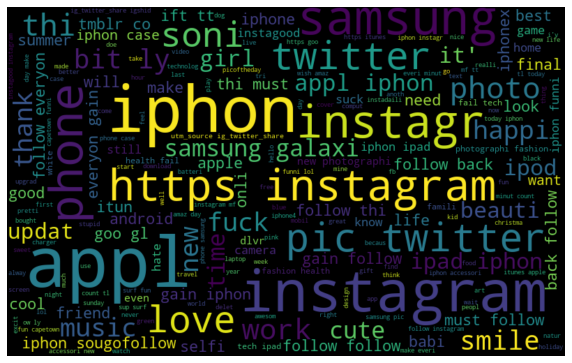

In [58]:
all_words = ' '.join([text for text in train_df['tidy_tweet']])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


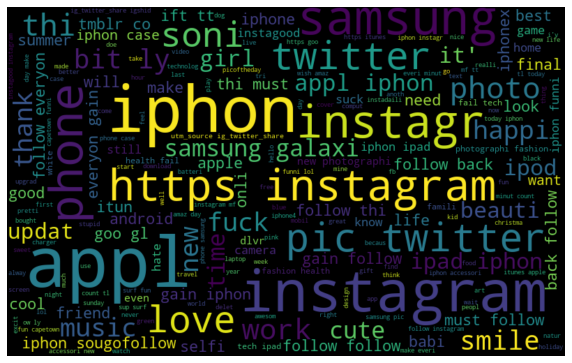

In [59]:
#Normal Text

all_words_label_0 = ' '.join([text for text in train_df['tidy_tweet'][train_df['label'] == 0.0]])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

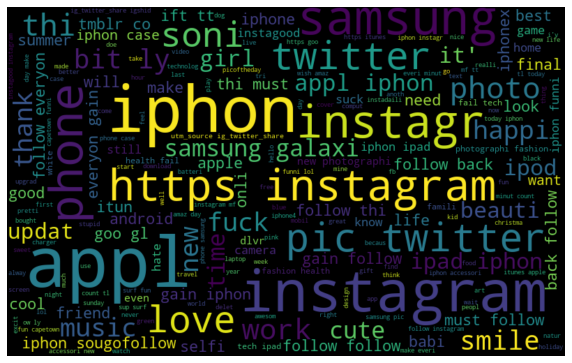

In [60]:
#Racist Text

all_words_label_1 = ' '.join([text for text in train_df['tidy_tweet'][train_df['label']==1.0]])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [81]:
label_0_hashtags = []
label_1_hashtags = []
import nltk

for i in train_df['tidy_tweet'][train_df['label']==0.0]:
    ht = re.findall(r"#(\w+)", i)
    label_0_hashtags.append(ht)

for i in train_df['tidy_tweet'][train_df['label']==1.0]:
    ht = re.findall(r"#(\w+)", i)
    label_1_hashtags.append(ht)
    
total_hash_0 = sum(label_0_hashtags,[])
total_hash_1 = sum(label_1_hashtags,[])

<function matplotlib.pyplot.show(*args, **kw)>

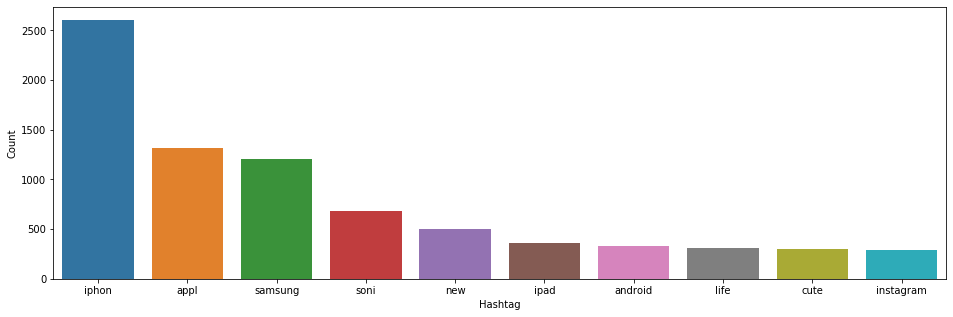

In [82]:
a = nltk.FreqDist(total_hash_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 10)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show

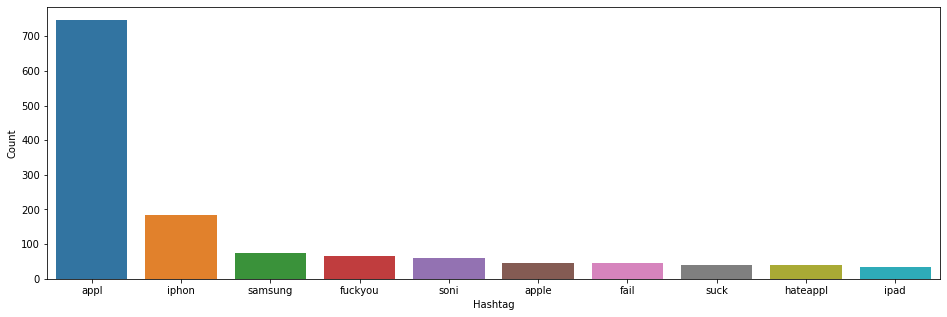

In [83]:
a = nltk.FreqDist(total_hash_1)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 10)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()